# House Price Prediction


**Table of contents**<a id='toc0_'></a>

- 1. [Data Preparation](#toc1_)
  - 1.1. [Data Collection & Ingestion](#toc1_1_)
  - 1.2. [Data Cleaning](#toc1_2_)
- 2. [Exploratory Data Analysis](#toc2_)
  - 2.1. [Univariate Analysis](#toc2_1_)
    - 2.1.1. [Numerical Columns](#toc2_1_1_)
    - 2.1.2. [Binary columns](#toc2_1_2_)
    - 2.1.3. [Categorical columns](#toc2_1_3_)
  - 2.2. [Bivariate/Multivariate Analysis](#toc2_2_)
    - 2.2.1. [Numerical values](#toc2_2_1_)
- 3. [Feature Engineering](#toc3_)
  - 3.1. [Transformations & Encoding](#toc3_1_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


In [116]:
from typing import List

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

## 1. <a id='toc1_'></a>[Data Preparation](#toc0_)


### 1.1. <a id='toc1_1_'></a>[Data Collection & Ingestion](#toc0_)


In [117]:
dataset = pd.read_csv("./data/Housing.csv")
dataset.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [119]:
dataset.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

### 1.2. <a id='toc1_2_'></a>[Data Cleaning](#toc0_)


In [120]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [121]:
dataset.duplicated().sum()

np.int64(0)

## 2. <a id='toc2_'></a>[Exploratory Data Analysis](#toc0_)


### 2.1. <a id='toc2_1_'></a>[Univariate Analysis](#toc0_)


#### 2.1.1. <a id='toc2_1_1_'></a>[Numerical Columns](#toc0_)


In [122]:
numerical_columns = ["price", "area"]

1.2122388370279802


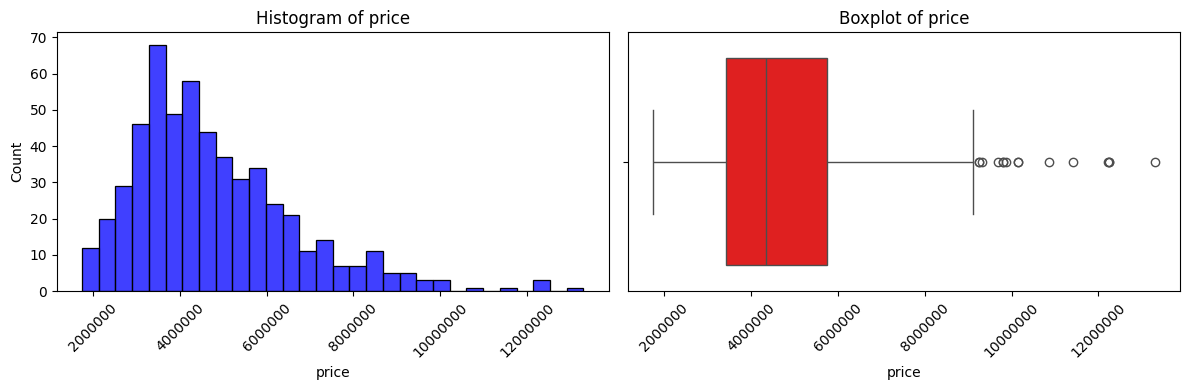

1.321188343153483


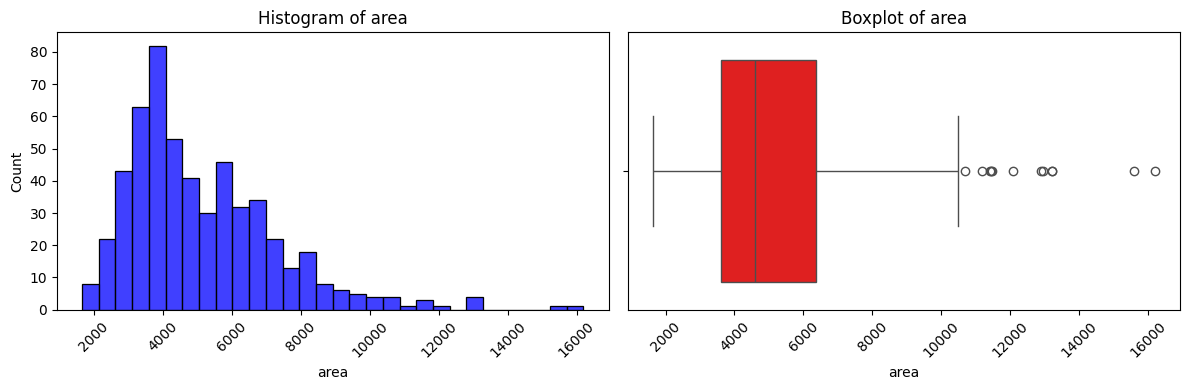

In [123]:
def plot_numerical_columns(dataset: pd.DataFrame, numerical_columns: List[str]) -> None:
    numerical_columns_dataset = dataset[numerical_columns].copy()

    for col in numerical_columns_dataset.columns:
        _, axes = plt.subplots(1, 2, figsize=(12, 4))
        skewness = numerical_columns_dataset[col].skew()
        print(skewness)

        sns.histplot(numerical_columns_dataset[col], bins=30, ax=axes[0], color="blue")
        axes[0].set_title(f"Histogram of {col}")
        axes[0].ticklabel_format(style="plain")
        axes[0].tick_params(axis="x", rotation=45)

        sns.boxplot(x=numerical_columns_dataset[col], ax=axes[1], color="red")
        axes[1].set_title(f"Boxplot of {col}")
        axes[1].xaxis.set_major_formatter(ScalarFormatter())
        axes[1].tick_params(axis="x", rotation=45)
        axes[1].ticklabel_format(style="plain", axis="x")
        axes[1].xaxis.get_offset_text().set_visible(False)

        plt.tight_layout()
        plt.show()


plot_numerical_columns(dataset, numerical_columns)

#### 2.1.2. <a id='toc2_1_2_'></a>[Binary columns](#toc0_)


In [124]:
binary_columns = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
]

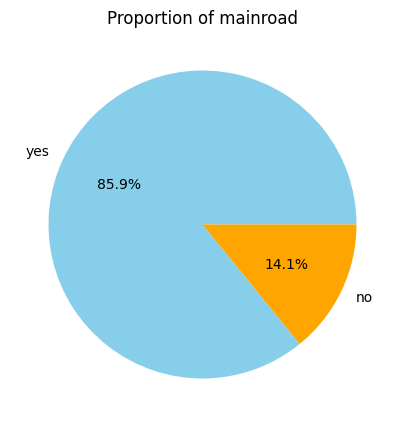

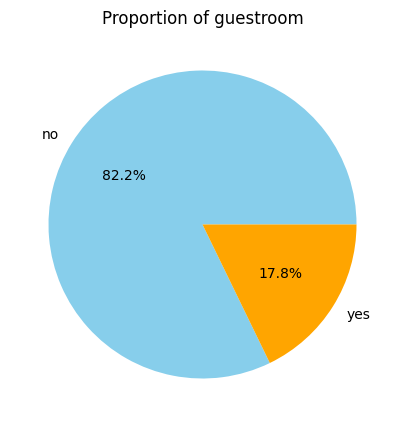

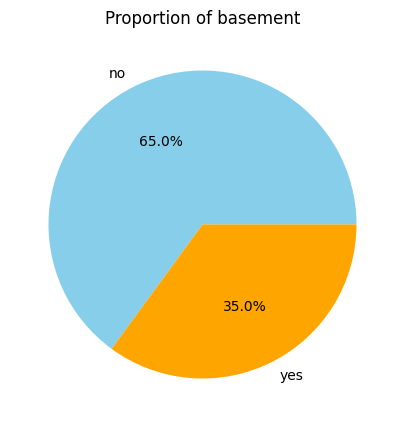

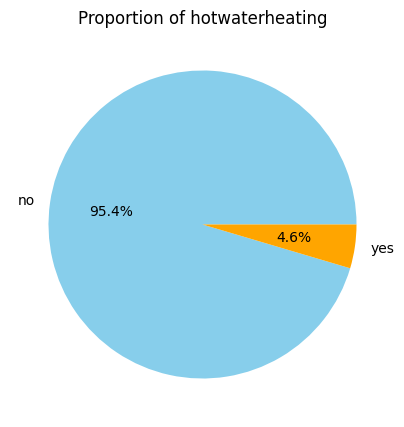

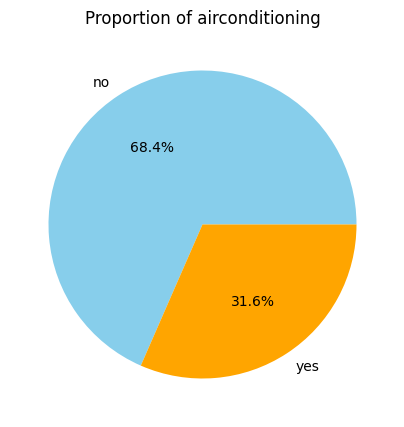

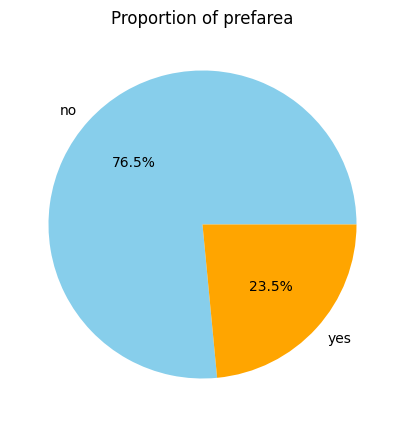

In [125]:
def plot_binary_columns(dataset: pd.DataFrame, binary_columns: List[str]) -> None:
    for col in binary_columns:
        plt.figure(figsize=(5, 5))
        dataset[col].value_counts().plot.pie(
            autopct="%1.1f%%", colors=["skyblue", "orange"]
        )
        plt.title(f"Proportion of {col}")
        plt.ylabel("")
        plt.show()


plot_binary_columns(dataset, binary_columns)

#### 2.1.3. <a id='toc2_1_3_'></a>[Categorical columns](#toc0_)


In [126]:
categorical_columns = [
    "bedrooms",
    "bathrooms",
    "stories",
    "parking",
    "furnishingstatus",
]

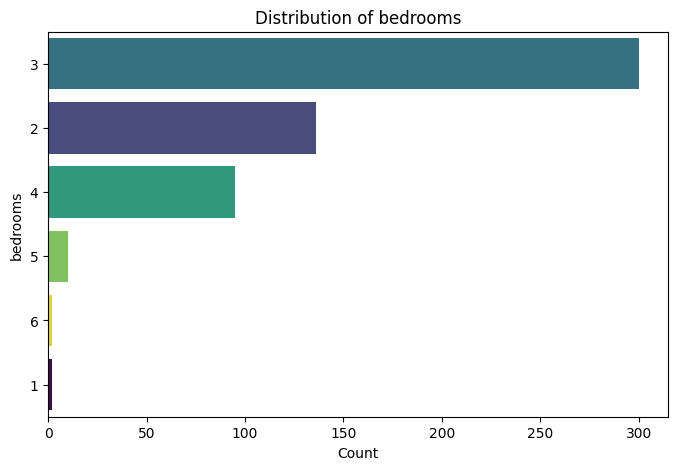

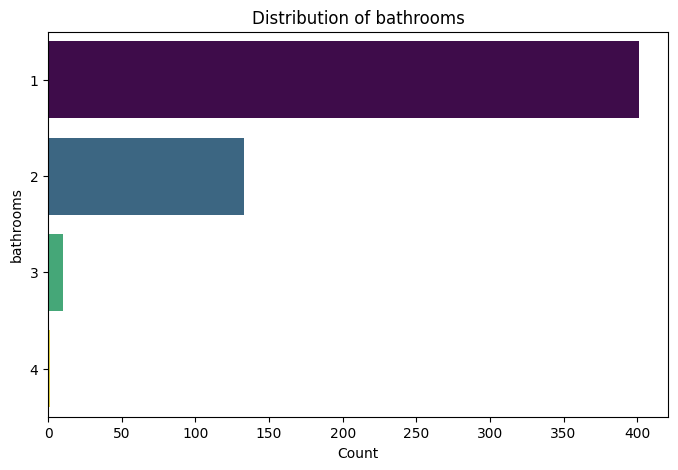

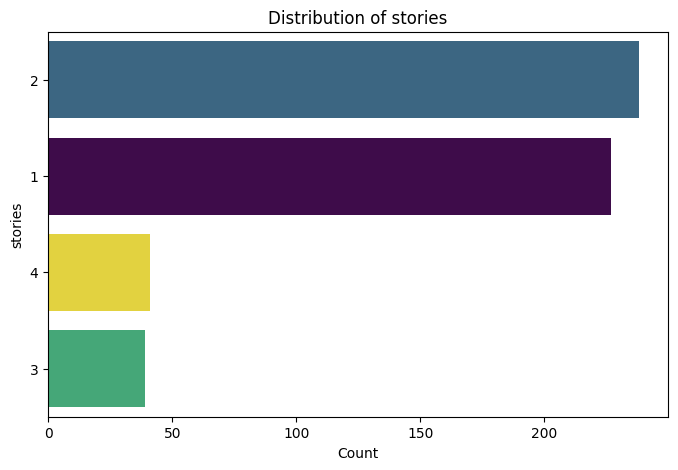

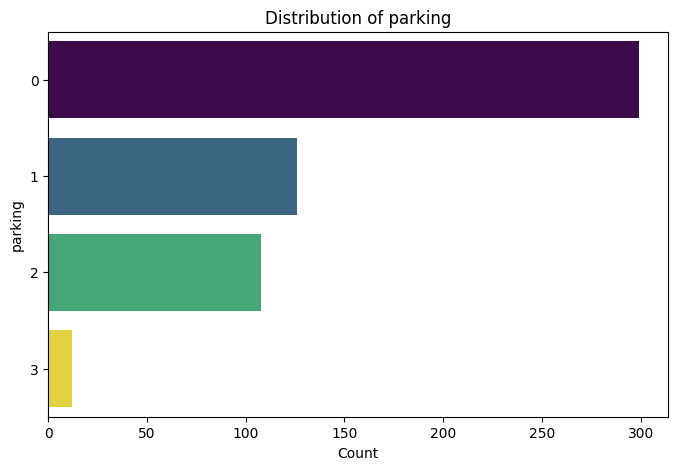

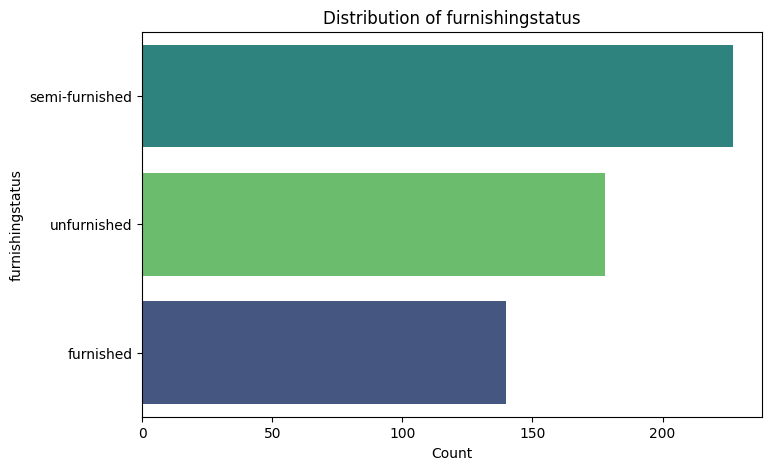

In [127]:
def plot_categorical_columns(
    dataset: pd.DataFrame, categorical_columns: List[str]
) -> None:
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(
            y=dataset[col],
            hue=dataset[col],
            legend=False,
            order=dataset[col].value_counts().index,
            palette="viridis",
        )
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()


plot_categorical_columns(dataset, categorical_columns)

### 2.2. <a id='toc2_2_'></a>[Bivariate/Multivariate Analysis](#toc0_)


#### 2.2.1. <a id='toc2_2_1_'></a>[Numerical values](#toc0_)


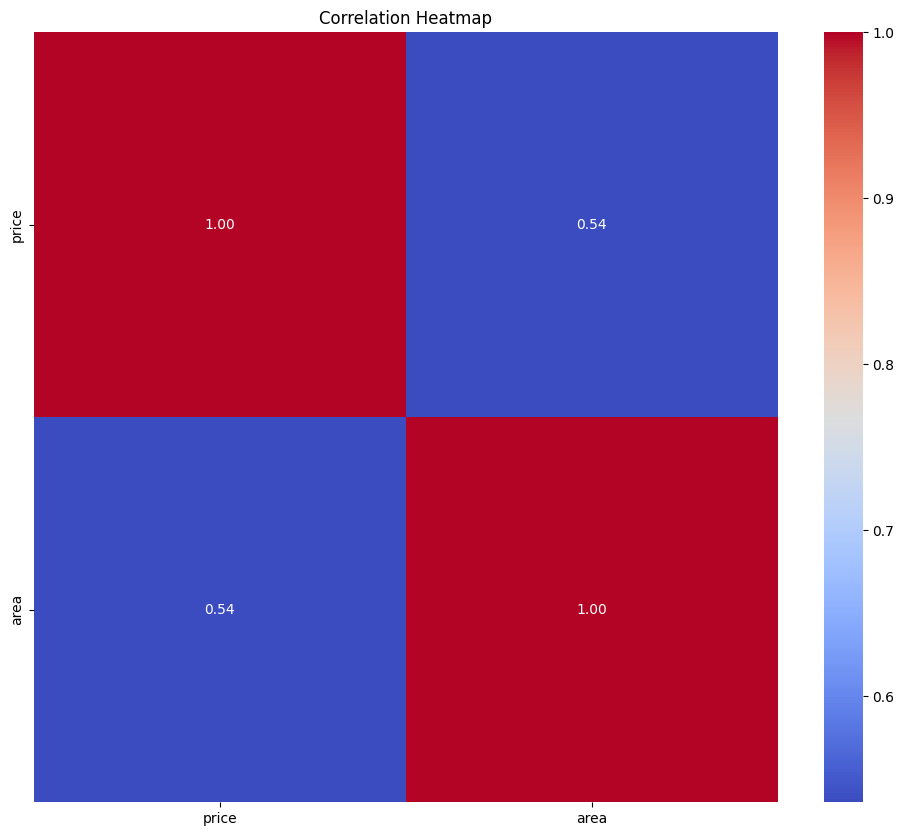

In [128]:
numerical_columns_dataset = dataset[numerical_columns].copy()

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_columns_dataset.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

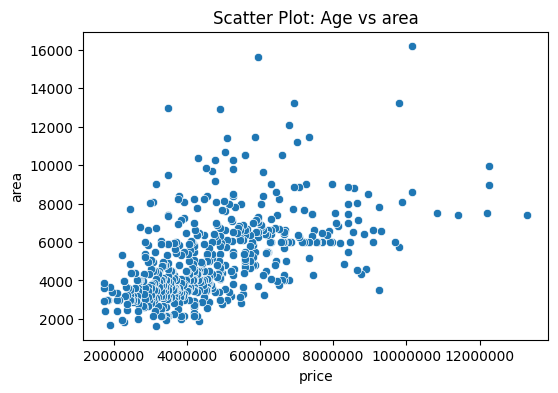

In [131]:
for col in numerical_columns_dataset.columns:
    if col != "price":
        plt.figure(figsize=(6, 4))
        plt.ticklabel_format(style="plain")
        sns.scatterplot(
            x=numerical_columns_dataset["price"],
            y=numerical_columns_dataset[col],
        )
        plt.title(f"Scatter Plot: Age vs {col}")
        plt.show()

## 3. <a id='toc3_'></a>[Feature Engineering](#toc0_)


### 3.1. <a id='toc3_1_'></a>[Transformations & Encoding](#toc0_)


#### Handling skewness in numerical columns


0.14086281102108905


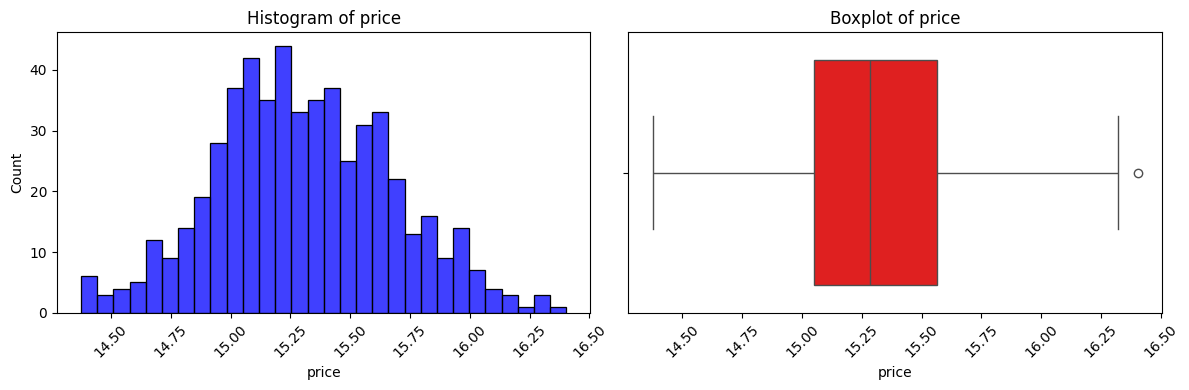

0.13374740415416703


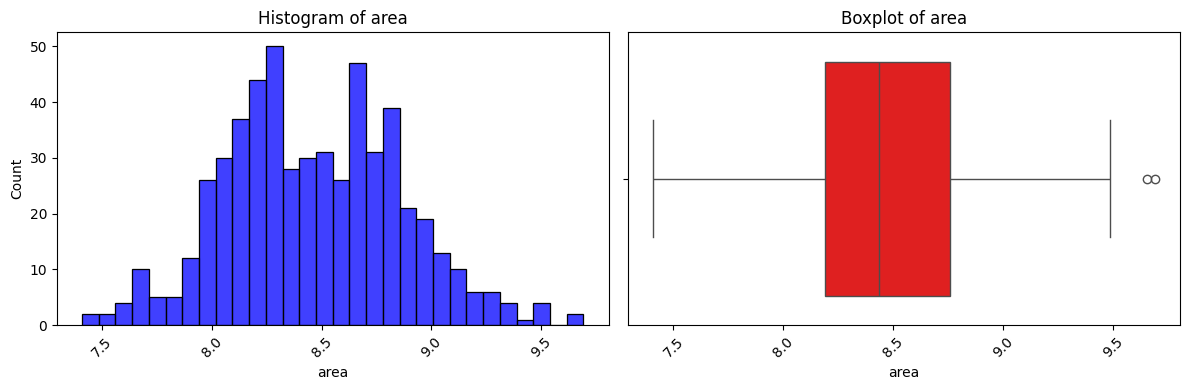

In [130]:
def transform_skewed_columns(
    dataset: pd.DataFrame, numerical_columns: List[str]
) -> pd.DataFrame:
    for col in numerical_columns:
        skewness = dataset[col].skew()
        if abs(skewness) > 1:
            dataset[col] = np.log1p(dataset[col])
    return dataset


dataset = transform_skewed_columns(dataset, numerical_columns)
plot_numerical_columns(dataset, numerical_columns)